# Goal:
1. Use prompt engineer to read pdf and extract json file
2. Simple visualize the result
3. See full tutorial [Link](https://learn.deeplearning.ai/chatgpt-prompt-eng/lesson/1/lesson_1)

In [3]:
# set up
import openai
import os
import pandas as pd
import numpy as np
from dotenv import load_dotenv, find_dotenv
_ = load_dotenv(find_dotenv()) # read local .env file

openai.api_key  = os.getenv('OPENAI_API_KEY')

In [39]:
def get_completion(prompt, model="gpt-3.5-turbo"): # Andrew mentioned that the prompt/ completion paradigm is preferable for this class
    messages = [{"role": "user", "content": prompt}]
    response = openai.chat.completions.create(
        model=model,
        messages=messages,
        temperature=0, # this is the degree of randomness of the model's output
    )
    return response.choices[0].message.content

In [53]:
df = pd.read_csv("./data/abstracts-machine learning urban planning-20231203-1932rows.csv")
df['Abstract'] = df['Abstract'].astype(str)
df['Abstract'] = df['Abstract'].str.replace('\n', ' ')
abstracts = df['Abstract'].values
# bin the abstracts into groups of 200
# abstracts_ls = np.array_split(abstracts, 100)

In [60]:
prompt = """
Read the array of paragraph, delimited by triple 
backticks below, and summarize the specific machine learning method or model used in a list format. 
The summarized methods should not have duplicates. It cannot be a general term such as 
"machine learning" or "supervised learning" or "unsupervised learning".
The summary should be in the following format:
[
    "method_1",
    "method_2",
    ...
    ]

```
{abs_text}
```
"""

In [34]:
# model="gpt-3.5-turbo"
# messages = [{"role": "user", "content": prompt}]
# response = openai.chat.completions.create(
#         model=model,
#         messages=messages,
#         temperature=0, # this is the degree of randomness of the model's output
#     )

In [61]:
task_ls = []
for i, temp in enumerate(abstracts[:2]):
    prompt = prompt.format(abs_text=temp)
    completion = get_completion(prompt)
    task_ls.append(completion)
    print(f"Completed task {i+1}")

Completed task 1
Completed task 2


In [62]:
task_ls

['[\n    "geographic information systems (GIS) technology",\n    "confirmatory factor analysis",\n    "unsupervised machine learning"\n]',
 '[\n    "geographic information systems (GIS) technology",\n    "confirmatory factor analysis",\n    "unsupervised machine learning"\n]']

In [42]:
# this is the full results
methodsummary = {
  "random forest": 451,
  "neural network": 404,
  "support vector machine": 358,
  "convolutional neural network": 158,
  "gradient boosting": 134,
  "decision tree": 119,
  "clustering": 104,
  "bayesian": 54,
  "lstm": 52,
  "feature selection": 28
}

/Users/yuan/opt/anaconda3/envs/ox/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yuan/opt/anaconda3/envs/ox/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yuan/opt/anaconda3/envs/ox/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/Users/yuan/opt/anaconda3/envs/ox/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Us

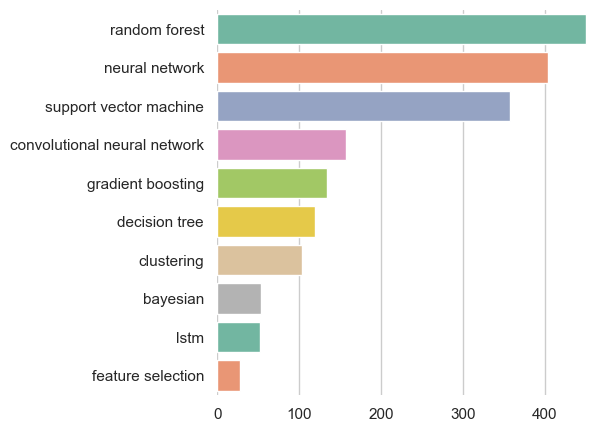

In [47]:
# visualize the result
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(5, 5))
sns.barplot(y=list(methodsummary.keys()), 
            x=list(methodsummary.values()),
            ax = ax,
            palette="Set2")
sns.despine(left=True, bottom=True)
# plt.xticks(rotation=45)